In [1]:
from utils import figi_from_ticker, get_shares, figi

In [2]:
data = get_shares('aapl')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,0.901228,0.918527,0.888393,0.917969,0.786033,163811200
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.855797,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.783644,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.795112,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.726304,767972800
...,...,...,...,...,...,...
2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900
2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400
2022-03-30,178.550003,179.610001,176.699997,177.770004,177.770004,92633200


In [4]:
figi['ticker']

0               SBWS
1               RCMX
2               FXTB
3       RU000A1007R9
4       RU000A102Q33
            ...     
2077              RH
2078             XYL
2079            IDCC
2080            AMED
2081             PGR
Name: ticker, Length: 2082, dtype: object

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [3]:
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [4]:
df = web.DataReader("TSLA", 'yahoo', start, end)

In [31]:
import pandas_datareader as pdr


In [32]:
f = pdr.get_data_moex(['USD000UTSTOM', 'MAGN'], '2020-07-02', '2020-07-07')

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\moex.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(part)
C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\moex.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(part)


In [36]:
f = pdr.moex.MoexReader('SBER').read()

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\moex.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(part)


In [37]:
f.head()

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,...,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,161.80,5.287147e+09,NaN,NaN,TQBR,NaN,NaN,NaN,161.8,NaN,...,NaN,NaN,NaN,NaN,5287146510.1,32726400.0,161.56,NaN,NaN,NaN
2017-04-04,163.50,3.789024e+09,NaN,NaN,TQBR,NaN,NaN,NaN,163.5,NaN,...,NaN,NaN,NaN,NaN,3789024448.8,23333230.0,162.43,NaN,NaN,NaN
2017-04-05,168.10,9.623816e+09,NaN,NaN,TQBR,NaN,NaN,NaN,168.1,NaN,...,NaN,NaN,NaN,NaN,9623815655.200001,57753380.0,166.63,NaN,NaN,NaN
2017-04-06,167.49,4.090698e+09,NaN,NaN,TQBR,NaN,NaN,NaN,167.49,NaN,...,NaN,NaN,NaN,NaN,4090698387.9,24422020.0,167.50,NaN,NaN,NaN
2017-04-07,161.49,9.744745e+09,NaN,NaN,TQBR,NaN,NaN,NaN,161.49,NaN,...,NaN,NaN,NaN,NaN,9744745429.1,59739010.0,163.14,NaN,NaN,NaN


In [5]:
times = df.index.values

In [6]:
prices = df['Close']

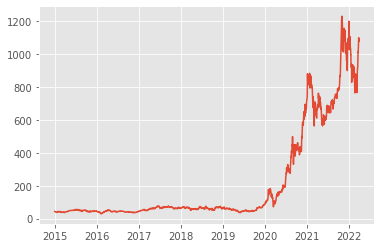

In [7]:
plt.plot(times, prices)
plt.savefig('test.png')

In [8]:
import time

In [102]:
str(round(time.time() * 1000))[-6:]

'641886'

In [103]:
import random

In [118]:
str(random.random())[-6:]

'448102'